# Part 1: data preprocessing

Dataset link: https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv

## Importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/insurance.csv')

## Data exploration

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

3

In [ ]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by "sex", "smoker", "region"

In [ ]:
dataset.groupby('sex')[['age','bmi','children','charges']].mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [ ]:
dataset.groupby('smoker')[['age','bmi','children','charges']].mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [ ]:
dataset.groupby('region')[['age','bmi','children','charges']].mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with missing values

In [ ]:
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isnull().values.sum()

0

## Encoding categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(dataset.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
# one-hot encoding

dataset = pd.get_dummies(data = dataset, drop_first=True)

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [ ]:
bool_cols = dataset.select_dtypes(include='bool').columns
dataset[bool_cols] = dataset[bool_cols].astype(int)

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
dataset.shape

(1338, 9)

## Correlation matrix

In [ ]:
dataset_2 = dataset.drop(columns = 'charges')

<Axes: title={'center': 'correlation with charges'}>

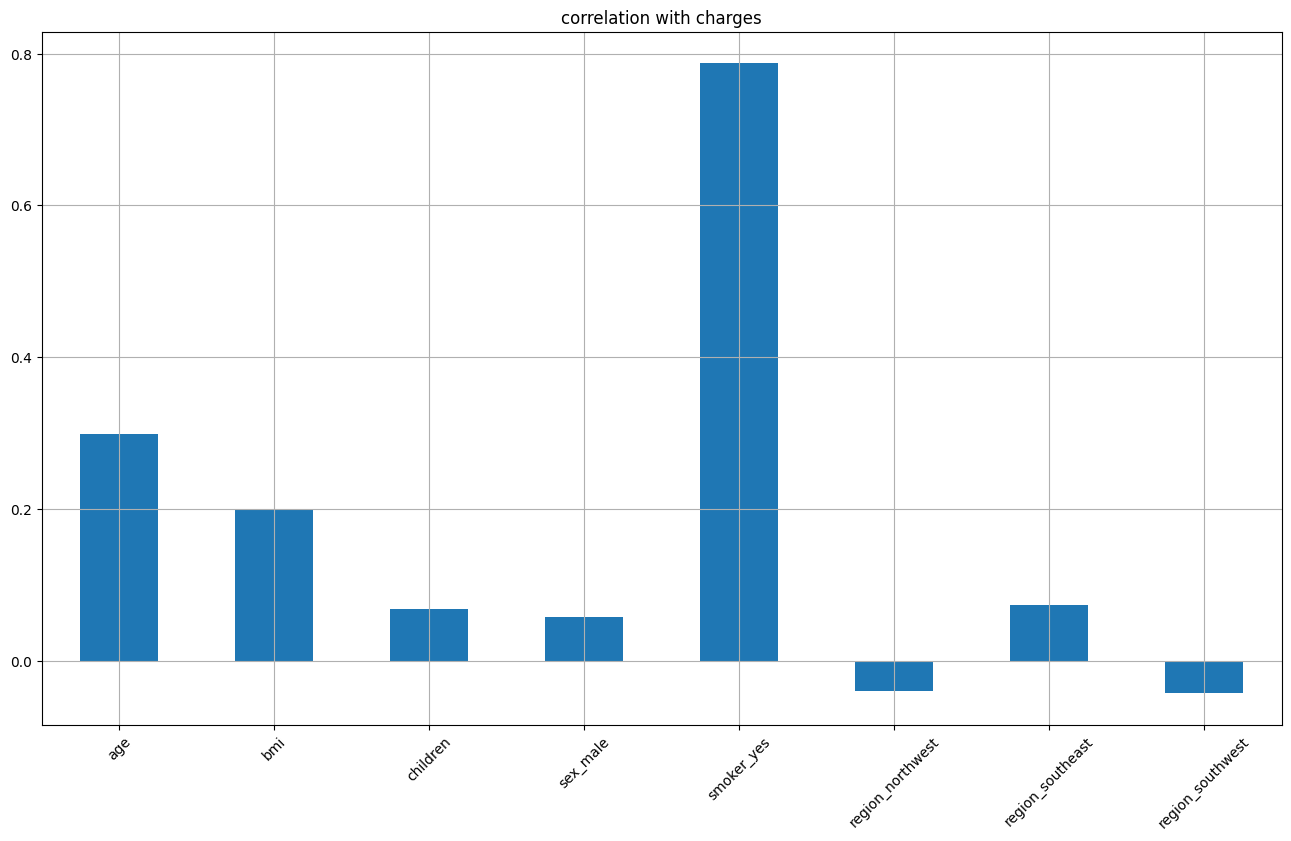

In [ ]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize = (16, 9),
    title = 'correlation with charges',
    rot = 45,
    grid = True
)

In [ ]:
corr = dataset.corr()

<Axes: >

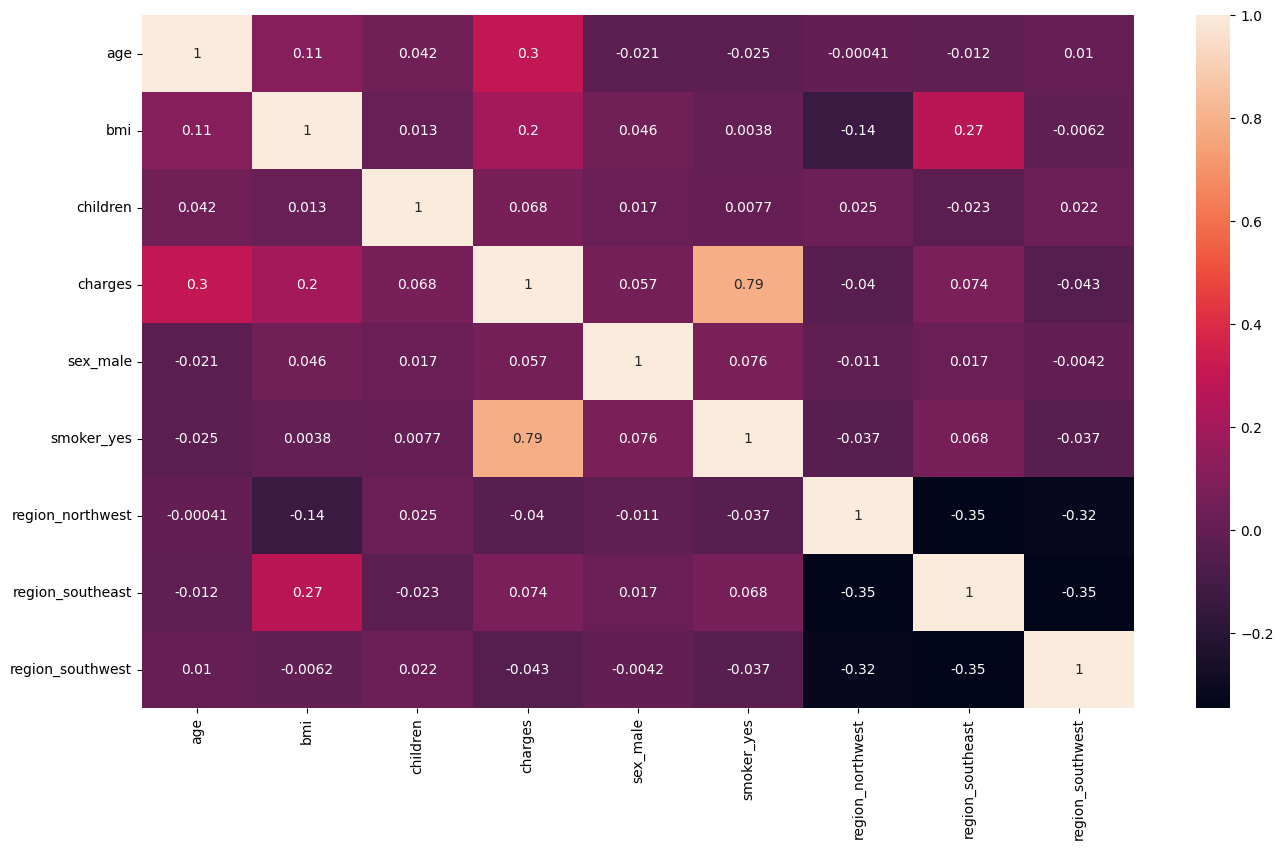

In [ ]:
#heatmap

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [ ]:
#splitting the dataset
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
# matrix of features / independent variable
x = dataset.drop(columns='charges')

In [ ]:
# target / dependent variable
y = dataset['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
x_train.shape

(1070, 8)

In [ ]:
y_train.shape

(1070,)

In [ ]:
x_test.shape, y_test.shape

((268, 8), (268,))

## feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.03308239, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -0.94368672, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139,  2.82086429,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [ ]:
x_test

array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -0.08946143, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60845296, -0.91119211, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495, -0.41972876, -0.08842793, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797,  2.78941026, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867,  0.60252728, -0.08842793, ..., -0.56079971,
        -0.59966106,  1.74729228]])

# Part 2: Building a model

## 1) Multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor_lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7835929767120722

## 2) Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regression_rf = RandomForestRegressor()
regression_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regression_rf.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8623793031060201

## 3) XGBoost regression

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
regression_xgb = XGBRFRegressor()
regression_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
y_pred = regression_xgb.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.877570307154844

# Part 3: Predict charges for a new customer

## Example 1

Name: David, Age:48, Sex:1, bmi: 36.50, children:2, smoker:1, region:southeast

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
frank_obs = [[48, 36.5, 2, 1,1,0,1,0]]

In [ ]:
regression_xgb.predict(scaler.transform(frank_obs))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43681.996], dtype=float32)

## Example 2

Name:Lisa, age:21, bmi:26, children:0, sex:female, smoker:no, region:northwest

In [ ]:
sara_obs = [[21,26,0,0,0,1,0,0]]

In [ ]:
regression_xgb.predict(scaler.transform(sara_obs))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2201.183], dtype=float32)

In [ ]:
##